In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib import cm
from random import random

<AxesSubplot:xlabel='Date'>

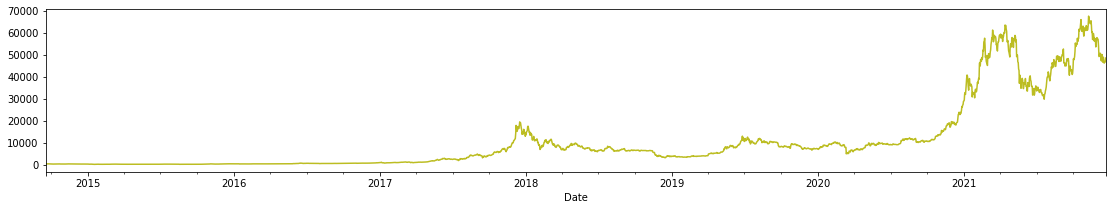

In [2]:
df = pd.DataFrame()

fig = plt.figure(figsize = (19,3))
df['BTC-USD'] = yf.Ticker('BTC-USD').history(period = 'max')['Close']
df['BTC-USD'].plot(color = 'tab:olive')

<AxesSubplot:xlabel='Date'>

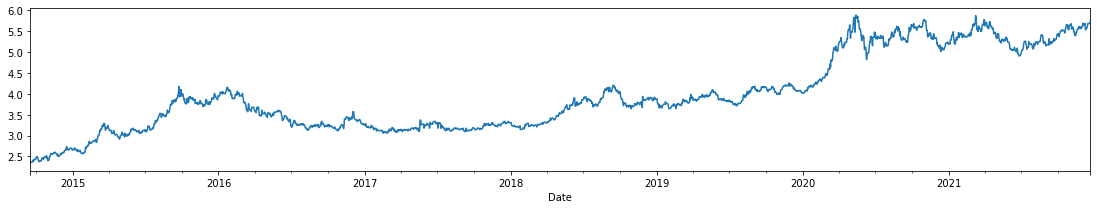

In [3]:
fig = plt.figure(figsize = (19,3))
df['USDBRL=X'] = yf.Ticker('USDBRL=X').history(period = 'max')['Close']
df = df.ffill()
df['USDBRL=X'].plot(color = 'tab:blue')

<AxesSubplot:xlabel='Date'>

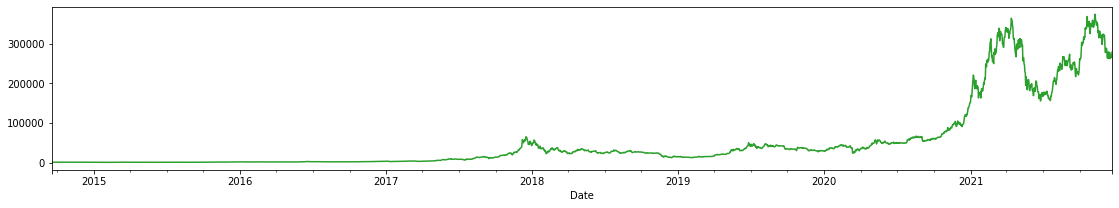

In [4]:
fig = plt.figure(figsize = (19,3))
df['BTC-BRL'] = df['USDBRL=X'] * df['BTC-USD']
df['BTC-BRL'].plot(color = 'tab:green')

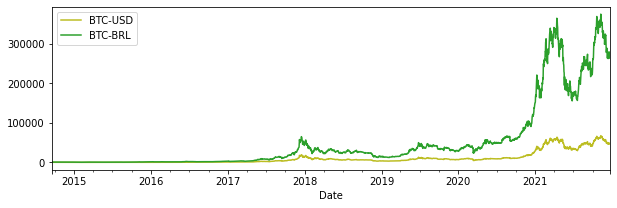

In [5]:
fig = plt.figure(figsize = (10,3))
df['BTC-USD'].plot(color = 'tab:olive', label = 'BTC-USD')
df['BTC-BRL'].plot(color = 'tab:green', label = 'BTC-BRL')
plt.legend()
plt.show()

In [7]:
df

,BTC-USD,USDBRL=X,BTC-BRL
Date,,,
2014-09-17,457.334015,2.33370,1067.280364
2014-09-18,424.440002,2.35530,999.683516
2014-09-19,394.795990,2.36320,932.981864
2014-09-20,408.903992,2.36320,966.321892
2014-09-21,398.821014,2.36320,942.493801
...,...,...,...
2021-12-17,46202.144531,5.68740,262770.070533
2021-12-18,46848.777344,5.68740,266447.729903
2021-12-19,46707.015625,5.68740,265641.474323


In [118]:
df.index[-1]

Timestamp('2021-12-21 00:00:00')

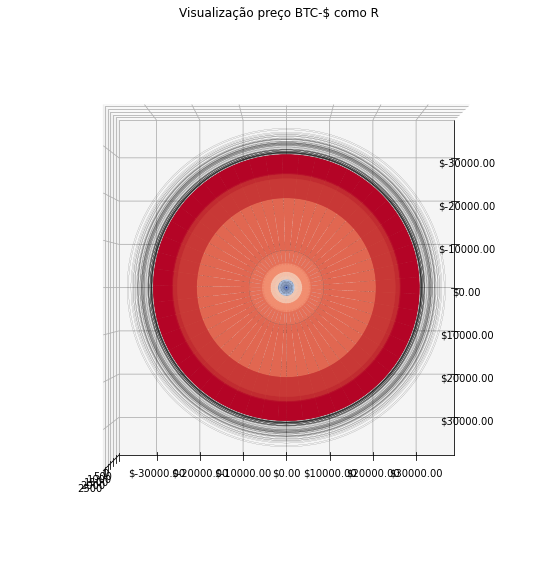

In [117]:
import matplotlib.dates as mdates

Radii = df['BTC-USD'].values/2
Zradii = range(len(df.index))

radius = CubicSpline(Zradii, Radii, bc_type=((1, 0.5), (1, 0.0)))

thetarange = np.linspace(0, 2 * np.pi, 100)
zrange = np.linspace(min(Zradii), max(Zradii), 100)
X = [radius(z)*np.cos(thetarange) for z in zrange]
Y = [radius(z)*np.sin(thetarange) for z in zrange]
Z = np.array([[z] for z in zrange])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

for zz in Zradii:
    XX = radius(zz)*np.cos(thetarange)
    YY = radius(zz)*np.sin(thetarange)
    ax.plot(XX,YY,zz, lw=0.1, color='k')

ax.xaxis.set_major_formatter('${x:1.2f}')
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.set_title('Visualização preço BTC-$ como R')

ax.view_init(elev=90., azim=0)
r = random()
plt.savefig('bitcoin-3d-0-90.png')
plt.show()